In [3]:
import pandas as pd
import re

df = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 5")

#dropping unnecessary information
df = df.drop(range(0,15))

#named each colums, will split them later (especially year and gender which is now combinded together)
df.columns=['Sort', 'Country/Area','Notes','Country Code','Data Type','1990-1995b', '1995-2000b', '2000-2005b','2005-2010b','2010-2015b','1990-1995m', '1995-2000m', '2000-2005m','2005-2010m','2010-2015m','1990-1995f', '1995-2000f', '2000-2005f','2005-2010f','2010-2015f']

#droped three columns, will fix later if needed
df = df.drop('Notes', axis=1)
df = df.drop('Data Type', axis=1)
df = df.drop('Sort', axis=1)

#showing rows of current data frame
df.head(100)

,Country/Area,Country Code,1990-1995b,1995-2000b,2000-2005b,2005-2010b,2010-2015b,1990-1995m,1995-2000m,2000-2005m,2005-2010m,2010-2015m,1990-1995f,1995-2000f,2000-2005f,2005-2010f,2010-2015f
15,WORLD,900,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,Developed regions,901,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,Developing regions,902,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,Least developed countries,941,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,Less developed regions excluding least develop...,934,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Timor-Leste,626,1.688974,1.689872,1.250407,-0.544288,-0.273186,1.359473,1.347639,1.825749,2.862733,-0.180912,2.00928,2.011802,0.702953,-4.556005,-0.404773
111,Viet Nam,704,12.010796,2.035528,-1.839079,3.528379,3.288573,12.311874,3.046591,-1.075794,2.906247,3.178972,11.649063,0.726827,-2.935897,4.429933,3.440475
112,Southern Asia,5501,-4.729682,-0.084908,-2.14828,0.862323,-0.313628,-4.69664,0.076948,-2.200676,1.073895,-0.649813,-4.769399,-0.281573,-2.084229,0.601374,0.098165
113,Afghanistan,4,4.299812,1.192711,2.794196,3.160624,26.37988,3.664544,1.828173,2.794752,3.160332,24.191602,5.094004,0.398266,2.793477,3.161003,28.900067


In [4]:
#splitting my dataframe #1 for regions

regionsDf = df[(df['Country Code'] == 901)|(df['Country Code'] == 902)|(df['Country Code'] == 941)|(df['Country Code'] == 934)] 

#right here I am melting the period column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
regionsDf = regionsDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="Annual rate of change of the migrant stock")

#renaming country/area to regions
regionsDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)

#Renaming year to period since it is no longer individual years, but a time period
regionsDf.rename(columns={'Years': 'Period'}, inplace=True)

#Seperating period from gender following tidy data principle #2 each column needs to consist of one and only one variable
regionsDf=(regionsDf.assign(Gender = lambda x: x.Period.str[9].astype(str), Period = lambda x: x.Period.str[:9].astype(str)))

regionsDf.head(10)

,Regions,Country Code,Period,Annual rate of change of the migrant stock,Gender
0,Developed regions,901,1990-1995,2.275847,b
1,Developing regions,902,1990-1995,-0.487389,b
2,Least developed countries,941,1990-1995,1.118175,b
3,Less developed regions excluding least develop...,934,1990-1995,-0.803244,b
4,Developed regions,901,1995-2000,2.264965,b
5,Developing regions,902,1995-2000,0.241777,b
6,Least developed countries,941,1995-2000,-3.001139,b
7,Less developed regions excluding least develop...,934,1995-2000,0.850177,b
8,Developed regions,901,2000-2005,2.50708,b
9,Developing regions,902,2000-2005,1.328107,b


In [5]:
#splitting my dataframe #2 for Countries

#identifying the data I want to include for this table according to their country code
CountryDf = df[(df['Country Code'] <900)]

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
CountryDf = CountryDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="Annual rate of change of the migrant stock")

#renaming the column to Countries
CountryDf.rename(columns={'Country/Area': 'Countries'}, inplace=True)

#Renaming year to period since it is no longer individual years, but a time period
CountryDf.rename(columns={'Years': 'Period'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
CountryDf=(CountryDf.assign(Gender = lambda x: x.Period.str[9].astype(str), Period = lambda x: x.Period.str[:9].astype(str)))

CountryDf.head(100)

,Countries,Country Code,Period,Annual rate of change of the migrant stock,Gender
0,Burundi,108,1990-1995,-5.355717,b
1,Comoros,174,1990-1995,-0.199873,b
2,Djibouti,262,1990-1995,-4.058465,b
3,Eritrea,232,1990-1995,0.910748,b
4,Ethiopia,231,1990-1995,-7.179771,b
...,...,...,...,...,...
95,Iraq,368,1990-1995,17.382315,b
96,Israel,376,1990-1995,1.86396,b
97,Jordan,400,1990-1995,5.866269,b
98,Kuwait,414,1990-1995,-3.060279,b


In [6]:
#splitting my dataframe #3 for Area of Destination

#Identifying the parameters I want to include in this data, sorting them according to country codes
AreaDf = df[((df['Country Code'] > 903) & (df['Country Code']< 954))|(df['Country Code']== 5501)|(df['Country Code']== 5500)]

#Because some of the areas includes regions between 903 to 954, I want to exclude the regions in here so I am using a function including the "not equal to "
AreaDf = AreaDf[(AreaDf['Country Code'] != 941)&(AreaDf['Country Code'] !=901)&(AreaDf['Country Code'] !=902)&(AreaDf['Country Code'] !=934)]

#renaming the column using pandas documentation
AreaDf.rename(columns={'Country/Area': 'Area of Destination'}, inplace=True)

#Renaming year to period since it is no longer individual years, but a time period
AreaDf.rename(columns={'Years': 'Period'}, inplace=True)

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
AreaDf = AreaDf.melt(id_vars=["Area of Destination","Country Code"], var_name=["Period"],value_name="Female migrants as a percentage of the international migrant stock")

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
AreaDf=(AreaDf.assign(Gender = lambda x: x.Period.str[9].astype(str), Period = lambda x: x.Period.str[:9].astype(str)))

AreaDf.head(100)

,Area of Destination,Country Code,Period,Female migrants as a percentage of the international migrant stock,Gender
0,Sub-Saharan Africa,947,1990-1995,0.845374,b
1,Eastern Africa,910,1990-1995,-3.435412,b
2,Middle Africa,911,1990-1995,11.88581,b
3,Northern Africa,912,1990-1995,-2.872903,b
4,Southern Africa,913,1990-1995,-3.114352,b
...,...,...,...,...,...
95,South America,931,2005-2010,2.588966,b
96,Northern America,905,2005-2010,2.428884,b
97,Oceania,909,2005-2010,3.360109,b
98,Australia and New Zealand,927,2005-2010,3.555413,b


<AxesSubplot:title={'center':'Plots showing change of Annual rate of migrant stock for different regions (1990-2015)'}, xlabel='Period', ylabel='Annual rate of change of the migrant stock'>

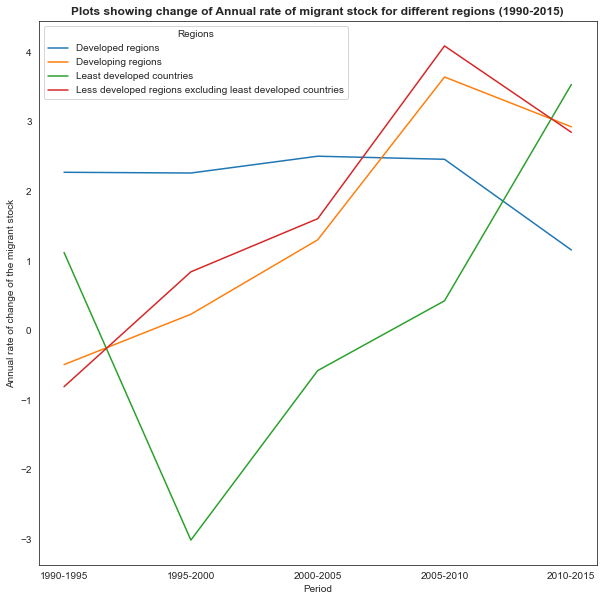

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


sns.set_style('white')

#we will be showing change of Annual rate of migrant stock for different regions (1990-2015) 
f, ax = plt.subplots(1, 1, figsize=(10,10))


ax.set_title('Plots showing change of Annual rate of migrant stock for different regions (1990-2015)',fontweight="bold")
ax.set_ylabel('Annual rate of change of the migrant stock')
ax.set_xlabel('Period')
sns.lineplot(y="Annual rate of change of the migrant stock", x="Period", hue = "Regions", estimator = "mean", ci=None, data=regionsDf, ax=ax)

